In [13]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
image1 = Image.open("datasets/train/images/1000.jpg")
image_array1 = np.array(image1)
plt.imshow(image_array1)

UnidentifiedImageError: cannot identify image file 'datasets/train/images/1000.jpg'

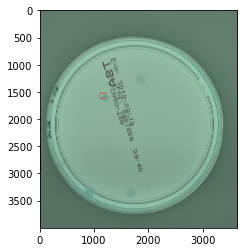

In [12]:
import cv2
face_image  = cv2.imread("datasets/train/images/1000.jpg")
cv2.rectangle(face_image, (1099, 1524), ((1099 + 190 //2), (1524 + 190 // 2)), (255, 0, 0), thickness=7)

plt.imshow(face_image)


In [8]:
face_image.shape

(4000, 3632, 3)

In [3]:
!git clone https://github.com/stephenhannaDA/bacteria_classification.git

Cloning into 'bacteria_classification'...
remote: Enumerating objects: 758, done.
remote: Counting objects: 100% (758/758), done.
remote: Compressing objects: 100% (754/754), done.
fatal: write error: No space left on device
fatal: index-pack failed


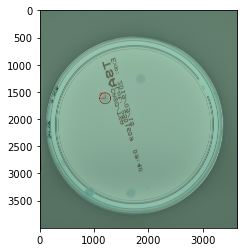

In [9]:
cv2.circle(face_image, (1099 + 190 //2, 1524 + 190 // 2), 100, (100, 0, 0), thickness=7)
plt.imshow(face_image)

In [3]:
# !git clone https://github.com/ultralytics/yolov5
# %cd yolov5
# %pip install -qr requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/studio-lab-user/sagemaker-studiolab-notebooks/Master's Project/AGAR/yolov5
Note: you may need to restart the kernel to use updated packages.


In [10]:
# import torch
# from yolov5 import utils
# display = utils.notebook_init()

Checking setup...


ModuleNotFoundError: No module named 'utils'

In [11]:
!python detect.py --weights yolov5s.pt --conf 0.25 --source "../train_data/1000.jpg"

python: can't open file '/home/studio-lab-user/sagemaker-studiolab-notebooks/Master's Project/AGAR/datasets/detect.py': [Errno 2] No such file or directory


In [12]:
display.Image(filename='runs/detect/exp2/1000.jpg', width=600)

AttributeError: 'function' object has no attribute 'Image'

In [20]:
missed_files

[]

In [24]:
# creates image labels for yolov5
import glob
import pandas as pd
import json
import collections
import os
count = collections.Counter()
num_files = 0
missed_files = []
for file in glob.glob('./val/val_json/*.json'):
    base = os.path.basename(file)
    file_without_ext = os.path.splitext(base)[0]
    if int(file_without_ext) < 309 and int(file_without_ext > 1302):
        continue
    with open(file, 'r') as f:
        data = json.load(f)
        count+=collections.Counter(data['classes'])
        num_files+=1
        image = cv2.imread(f"./val/images/{file_without_ext}.jpg")
        if image is None:
            missed_files.append(file)
            continue
        image_shape = image.shape
        with open(f'./val/labels/{file_without_ext}.txt', 'w') as wf:
            for label in data['labels']:
                try:
                    int_class = label_mapping[(label['class'])]
                except KeyError:
                    continue
                height = label['height']
                width = label['width']
                height_normed = label['height'] / image_shape[0]
                width_normed = label['width'] / image_shape[1]
                x = label['x']
                y = label['y']
                x_center_normed = (x + width // 2) / image_shape[1]
                y_center_normaed = (y + height // 2) / image_shape[0]
                wf.write(" ".join(map(str, [int_class, x_center_normed, y_center_normaed, width_normed, height_normed])))
                wf.write('\n')

Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
P

In [4]:
!ls train/labels

ls: cannot access 'train/labels': No such file or directory


In [14]:
!rm datasets/train/images/*.jpg

In [40]:
count

Counter({'B.subtilis': 133,
         'S.aureus': 127,
         'C.albicans': 147,
         'P.aeruginosa': 168,
         'E.coli': 161})

In [44]:
label_mapping = {k: v for v, k in enumerate(dict(count).keys())}

In [14]:
label_mapping = {'B.subtilis': 0,
 'S.aureus': 1,
 'C.albicans': 2,
 'P.aeruginosa': 3,
 'E.coli': 4}

In [1]:
!python yolov5/train.py --img 1920 \
--rect \
--batch 4 \
--epochs 60 \
--data dataset.yaml \
--weights yolov5/best.pt \
# --resume \
--save-period 1 
# --adam

wandb: Currently logged in as: stephenhanna (use `wandb login --relogin` to force relogin)
train: weights=yolov5/best.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=60, batch_size=4, imgsz=1920, rect=True, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 6 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2022-2-6 torch 1.10.2+cu102 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.0032, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

In [29]:
!pwd

/home/studio-lab-user/sagemaker-studiolab-notebooks/Master's Project/AGAR/datasets


In [30]:
%cd ..

/home/studio-lab-user/sagemaker-studiolab-notebooks/Master's Project/AGAR
